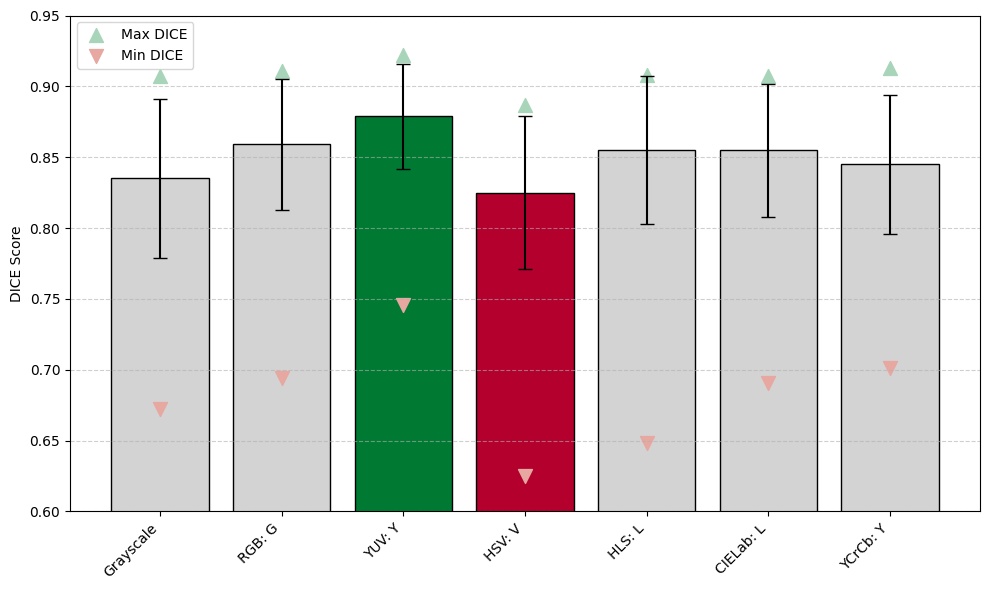

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
data = {
    "Color Space Channel": [
        "Grayscale", "RGB: G", "YUV: Y", "HSV: V",
        "HLS: L", "CIELab: L", "YCrCb: Y"
    ],
    "Mean DICE": [0.835, 0.859, 0.879, 0.825, 0.855, 0.855, 0.845],
    "Std DICE": [0.056, 0.046, 0.037, 0.054, 0.052, 0.047, 0.049],
    "Max DICE": [0.907, 0.911, 0.922, 0.887, 0.908, 0.907, 0.913],
    "Min DICE": [0.672, 0.694, 0.746, 0.625, 0.648, 0.691, 0.701]
}

# Create DataFrame
df = pd.DataFrame(data)

# Find indices
best_index = df["Mean DICE"].idxmax()
worst_index = df["Mean DICE"].idxmin()

# Color mapping (muted green and red for best/worst)
colors = ['lightgray'] * len(df)
colors[best_index] = '#007A33'  # Muted green
colors[worst_index] = '#B3002D'  # Muted red

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(df["Color Space Channel"], df["Mean DICE"],
               yerr=df["Std DICE"], capsize=5, color=colors, edgecolor='black')

# Add markers for max and min DICE
x_positions = range(len(df))
plt.scatter(x_positions, df["Max DICE"], color='#A8D5BA', marker='^', s=100, label='Max DICE')
plt.scatter(x_positions, df["Min DICE"], color='#E6A8A1', marker='v', s=100, label='Min DICE')

# Labels and style
plt.ylabel("DICE Score")
plt.ylim(0.6, 0.95)
plt.xticks(ticks=x_positions, labels=df["Color Space Channel"], rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

plt.show()


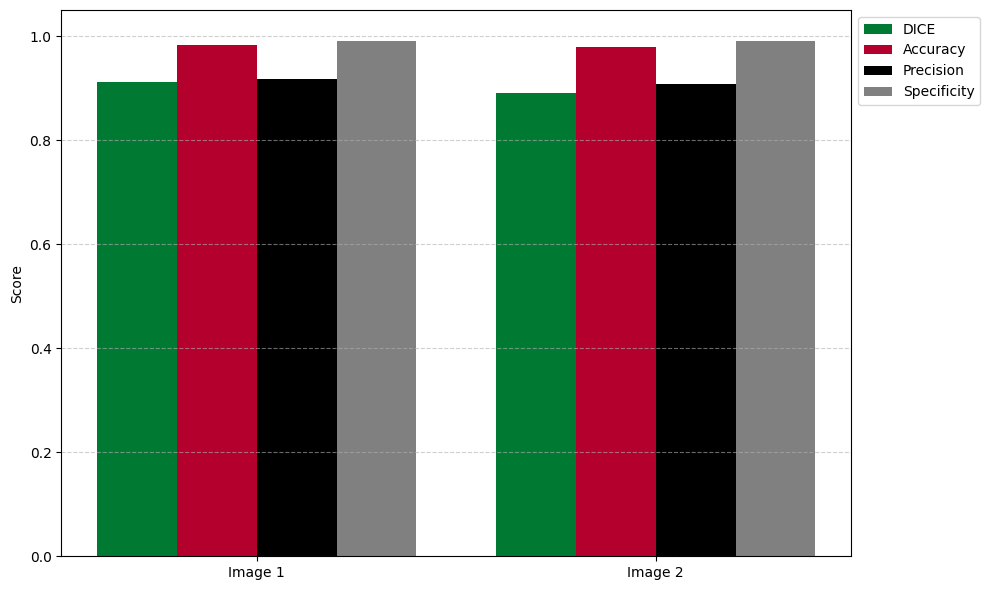

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data
data = {
    "Image": ["Image 1", "Image 2"],
    "DICE": [0.912, 0.891],
    "Accuracy": [0.982, 0.979],
    "Precision": [0.917, 0.907],
    "Specificity": [0.991, 0.990]
}

# Create DataFrame
df = pd.DataFrame(data)
df.set_index("Image", inplace=True)

# Plot configuration
metrics = df.columns
x = np.arange(len(df.index))  # Image positions
width = 0.2  # Bar width
colors = ['#007A33', '#B3002D', 'black', 'grey']

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each metric as a group of bars
for i, (metric, color) in enumerate(zip(metrics, colors)):
    ax.bar(x + i * width - 1.5 * width, df[metric], width, label=metric, color=color)

# Axis styling
ax.set_ylabel("Score")
ax.set_xticks(x)
ax.set_xticklabels(df.index)
ax.set_ylim(0, 1.05)  # Start from 0

# Grid and legend
ax.grid(axis='y', linestyle='--', alpha=0.6)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside

plt.tight_layout()
plt.show()
